## Imports



In [96]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [97]:
def show(img, dpi):
    fig = plt.figure(dpi=dpi)
    plt.imshow(img, cmap='gray')
    plt.show()

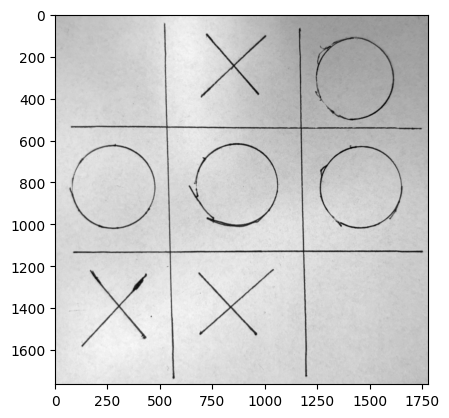

In [98]:
img = cv.imread('1.JPG')
img = cv.resize(img, (0,0), fx=0.5, fy=0.5)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
show(gray, 100)

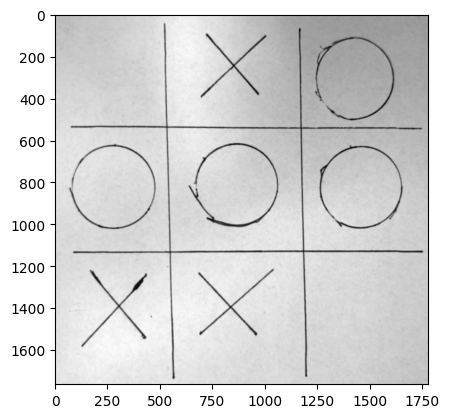

In [99]:
blurred = cv.GaussianBlur(gray, (9, 9), 1.5)
show(blurred, 100)

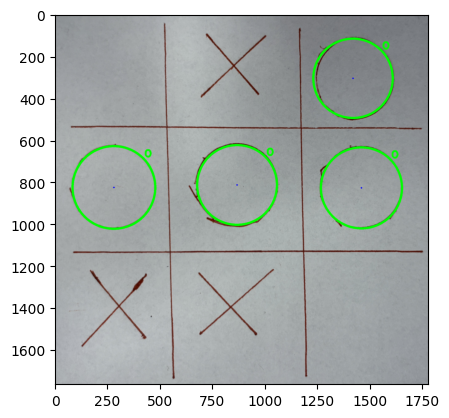

In [100]:
circles = cv.HoughCircles(blurred, cv.HOUGH_GRADIENT, 1, 110,
                          param1=120, param2=20, minRadius=180, maxRadius=200)

circles = np.uint16(np.around(circles))

circle_image = img.copy()
for i in circles[0, :]:
    # draw the outer circle
    cv.circle(circle_image, (i[0], i[1]), i[2], (0, 255, 0), 10)
    # draw the center of the circle
    cv.circle(circle_image, (i[0], i[1]), 2, (0, 0, 255), 3)

for c in circles[0]:
    cx, cy, r = c

    # angle where text will sit (radians)
    angle = -np.pi / 4  # top-right

    # point on circle
    x = int(cx + r * np.cos(angle))
    y = int(cy + r * np.sin(angle))

    # push text slightly outward
    offset = 10
    x += int(offset * np.cos(angle))
    y += int(offset * np.sin(angle))

    cv.putText(circle_image,"O",(x, y),cv.FONT_HERSHEY_SIMPLEX,1.5,(0, 255, 0),8
    )

show(circle_image, 100)

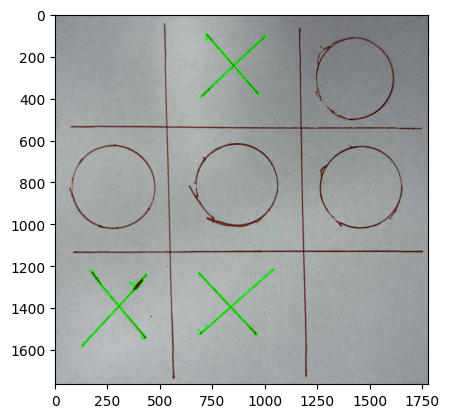

In [101]:
thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 2)
kernel = np.ones((3,3), np.uint8)
thresh = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel)

xs_img = img.copy()

contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    area = cv.contourArea(cnt)
    if 5000 < area < 7500:
        x, y, w, h = cv.boundingRect(cnt)
        aspect = w / float(h)
        if 0.8 < aspect < 1.3:  # 'X' roughly square
            cv.drawContours(xs_img, [cnt], -1, (0, 255, 0), 3)


show(xs_img, 100)

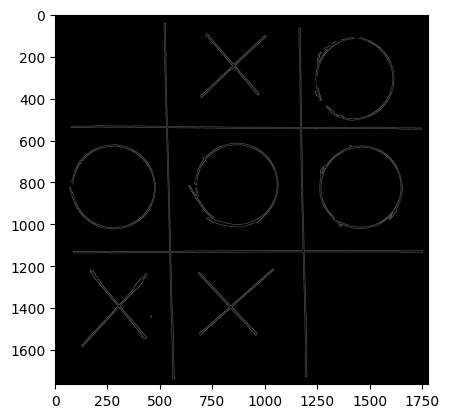

In [102]:
canny = cv.Canny(blurred, 125, 175, apertureSize=3)
show(canny, 100)

88
121


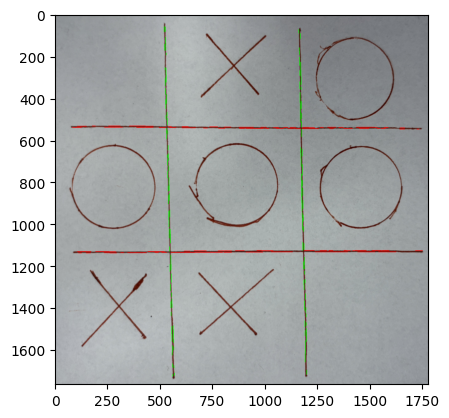

In [103]:
lines = cv.HoughLinesP(canny, 1, np.pi/180, 80, 100, 10)

horizontal = []
vertical = []
lines_img = img.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        length = np.hypot(x2 - x1, y2 - y1)
        angle = abs(np.arctan2(y2 - y1, x2 - x1) * 180 / np.pi)

        if angle < 10 or angle > 170:
            horizontal.append(line[0])
            cv.line(lines_img, (x1, y1), (x2, y2), (255, 0, 0), 2)

        elif 80 < angle < 100:
              vertical.append(line[0])
              cv.line(lines_img, (x1, y1), (x2, y2), (0, 255, 0), 2)


print(len(horizontal))
print(len(vertical))
show(lines_img, 100)

In [104]:
def tic_tac_toe(path):
    img = cv.imread(path)
    img = cv.resize(img, (0,0), fx=0.5, fy=0.5)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    blurred = cv.GaussianBlur(gray, (9, 9), 1.5)
    canny = cv.Canny(blurred, 125, 175, apertureSize=3)
    lines = lines = cv.HoughLinesP(canny, 1, np.pi/180, 80, 100, 10)

    final_img = img.copy()

    circles = cv.HoughCircles(blurred, cv.HOUGH_GRADIENT, 1, 110,
                          param1=120, param2=20, minRadius=180, maxRadius=200)

    circles = np.uint16(np.around(circles))

    for i in circles[0, :]:
        # draw the outer circle
        cv.circle(final_img, (i[0], i[1]), i[2], (0, 255, 0), 10)
        # draw the center of the circle
        cv.circle(final_img, (i[0], i[1]), 2, (0, 0, 255), 3)

    for c in circles[0]:
        cx, cy, r = c

        # angle where text will sit (radians)
        angle = -np.pi / 4  # top-right

        # point on circle
        x = int(cx + r * np.cos(angle))
        y = int(cy + r * np.sin(angle))

        # push text slightly outward
        offset = 10
        x += int(offset * np.cos(angle))
        y += int(offset * np.sin(angle))

        cv.putText(final_img,"O",(x, y),cv.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0),8)

    thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 2)
    kernel = np.ones((3,3), np.uint8)
    thresh = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel)

    contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        area = cv.contourArea(cnt)
        if 5000 < area < 7500:
            x, y, w, h = cv.boundingRect(cnt)
            aspect = w / float(h)
            if 0.8 < aspect < 1.3:  # 'X' roughly square
                cv.drawContours(final_img, [cnt], -1, (0, 0, 255), 3)
                cv.putText(final_img, "X", (x, y), cv.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 255), 8)


    horizontal = []
    vertical = []
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            length = np.hypot(x2 - x1, y2 - y1)
            angle = abs(np.arctan2(y2 - y1, x2 - x1) * 180 / np.pi)

            if angle < 10 or angle > 170:
                horizontal.append(line[0])
                cv.line(final_img, (x1, y1), (x2, y2), (255, 0, 0), 2)

            elif 80 < angle < 100:
                vertical.append(line[0])
                cv.line(final_img, (x1, y1), (x2, y2), (255, 0, 0), 2)

    show(final_img, 100)

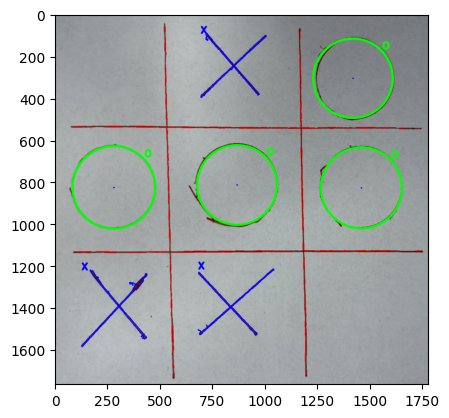

In [105]:
tic_tac_toe('1.JPG')